In [11]:
%load_ext autoreload
%autoreload 2
import scratch
from scratch import *
from toriccode.plot_utils import *
from toriccode.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from toriccode.env import *
local_terms, coefs = get_ising_terms(4)
qubits = Term.get_qubits(local_terms)
h = HamiltonianBuilder(verbose=False).build_matrix(local_terms, coefs)
eigs, vecs = calc_eigs(h, 4)

Padding operators
tensor producting


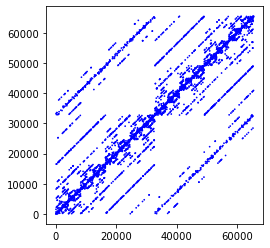

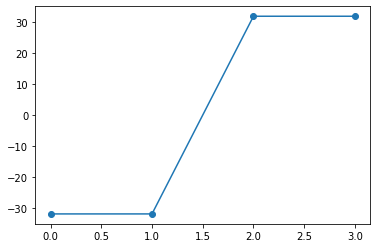

In [3]:
plot_hamiltonian_matrix(h); plt.show()
plt.plot(eigs, marker='o'); plt.show()

In [14]:
one_hot = sparse.eye(h.shape[0]).getcol(1)
one_hot_dense = one_hot.toarray()
v = sparse.linalg.expm_multiply(-1j * h, one_hot)
v_dense = v.toarray()
#v = 

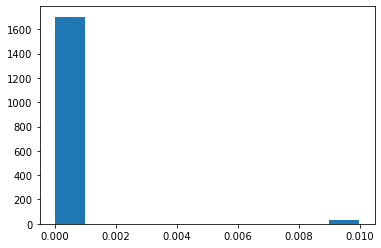

In [148]:
plt.hist(np.abs(v_dense[(np.abs(v_dense) > 1e-6) & (np.abs(v_dense) < 0.8)]));# plt.yscale('log')

In [13]:
import scipy.linalg as lin
if h.shape[0] < 1000:
    U = lin.expm(-j * h.toarray())
    v_dense = np.dot(U, one_hot_dense)
else:
    print("H too big!")

H too big!


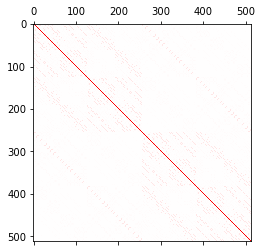

In [115]:
plot_bwr(np.abs(U))

Plotting 32 of 32768 components above threshold


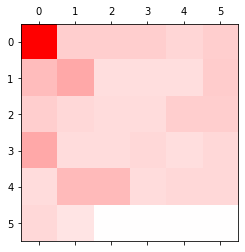

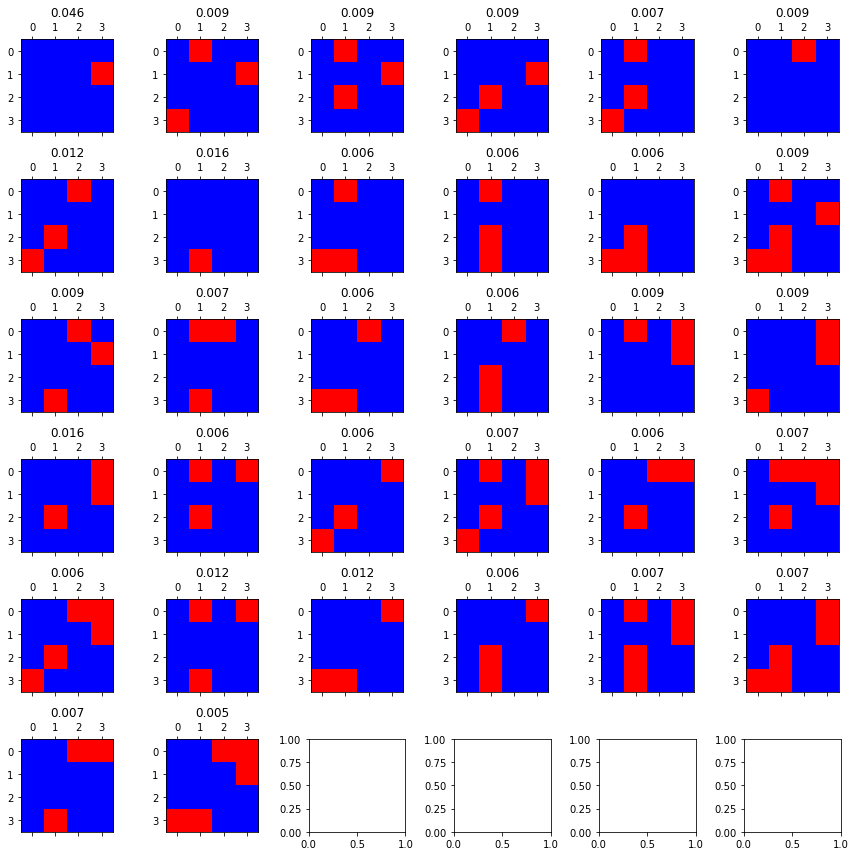

In [15]:
plot_vec_sites(np.abs(v_dense).reshape(-1),qubits, threshold=0.005);plt.tight_layout(); plt.show()

Plotting 1 of 1 components above threshold


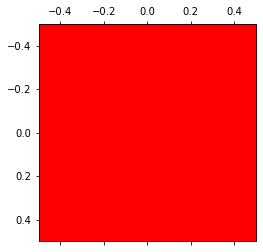

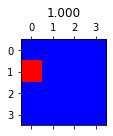

Plotting 32 of 32 components above threshold


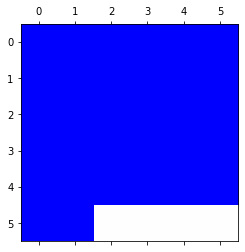

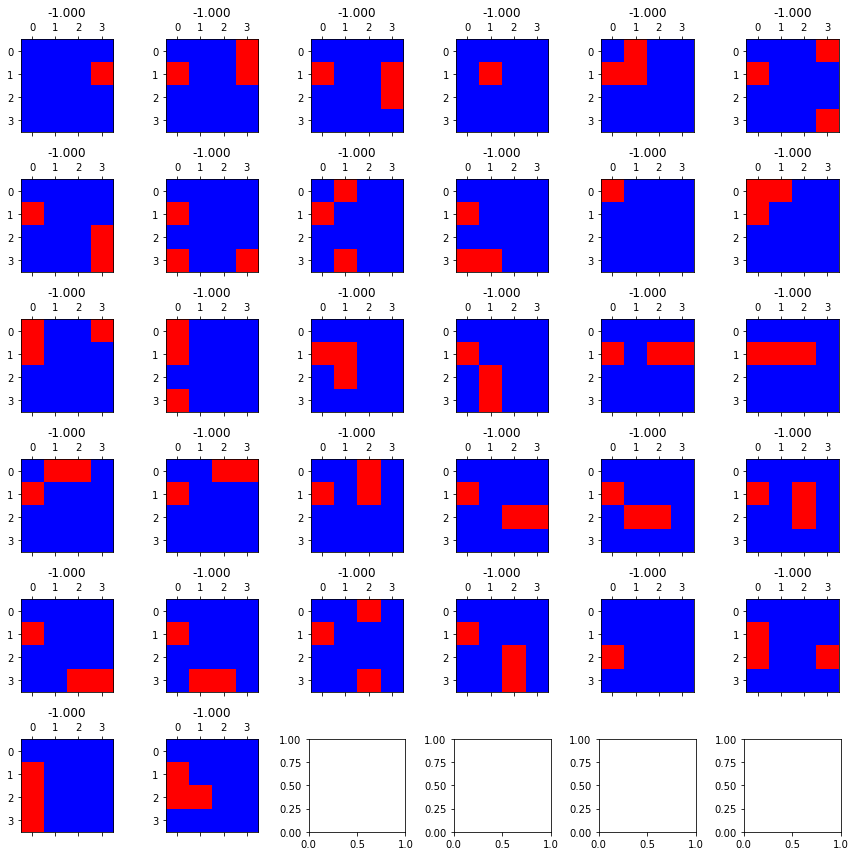

In [133]:
import scipy.sparse
one_hot = eye.getcol(1)
one_hot_dense = one_hot.toarray().ravel()
plot_vec_sites(one_hot_dense, qubits); plt.tight_layout(); plt.show()
plot_vec_sites(h[1].toarray().ravel(), qubits); plt.tight_layout(); plt.show()

In [34]:
import numpy as np
from matplotlib import pyplot as plt

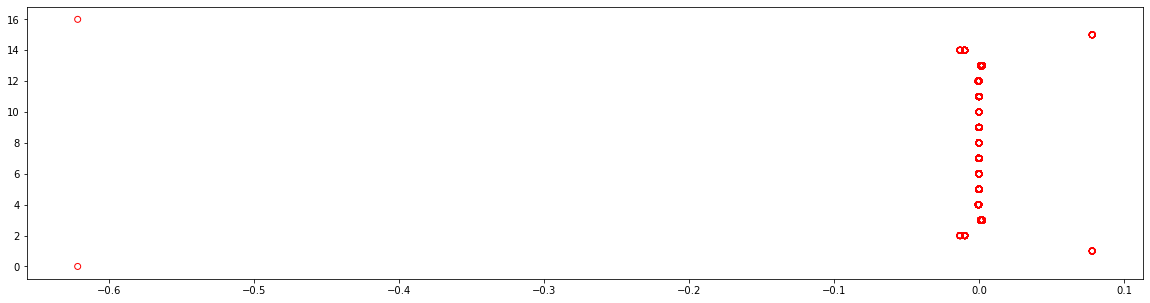

In [18]:
#up_bits = np.array([sum(int_to_bit_list(h.shape[0],i)) for i in range(h.shape[0])])
up_bits = np.array([i.bit_count() for i in range(h.shape[0])])
plt.figure(figsize=(20,5))
plt.scatter(vecs[:,0], up_bits, facecolors='none', edgecolors='r')

In [52]:
np.unique(np.round(vecs[:,0][up_bits == 3],5))

array([-0.00354, -0.00245, -0.00179, -0.00134])